<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0, 0.5, 'Median Home Value ($1,000s)')

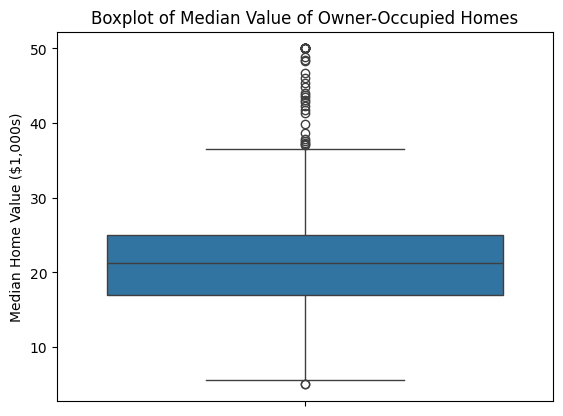

In [23]:
sns.boxplot(y=boston_df["MEDV"])
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes")
pyplot.ylabel("Median Home Value ($1,000s)")
#FINDINGS:
# -median value appears to be roughly $21,000
# -most houses (the interquartile range) are valued between $17,000 and $25,000
# -there is a considerable amount of outliers reaching $50,000

Text(0, 0.5, 'Number of Houses')

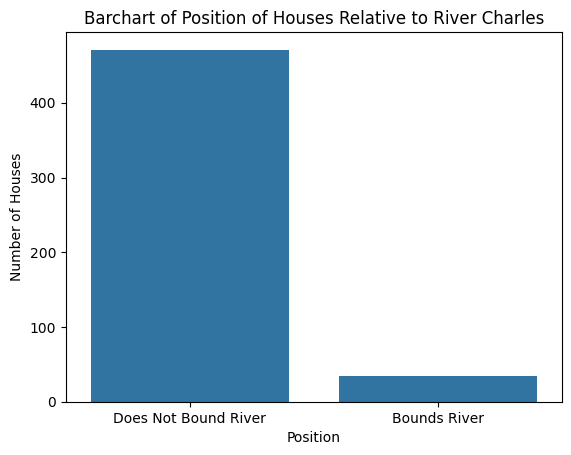

In [24]:
sns.countplot(x=boston_df["CHAS"])
pyplot.title("Barchart of Position of Houses Relative to River Charles")
pyplot.xlabel("Position")
pyplot.xticks(ticks=[0,1], labels=["Does Not Bound River", "Bounds River"])
pyplot.ylabel("Number of Houses")
#FINDINGS:
#the majority of houses, over 400, do not bound the river. Only very few, roughly 40, do.

Text(0, 0.5, 'Median Home Value ($1,000s)')

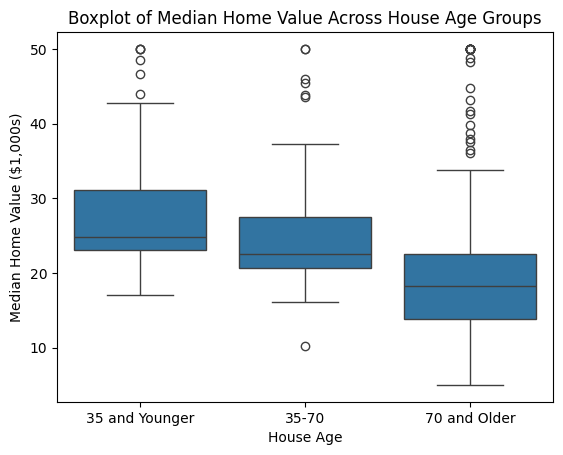

In [26]:
bins=[0, 35, 70, 100]
labels=["35 and Younger", "35-70", "70 and Older"]
boston_df["AGE_GROUP"]=pd.cut(boston_df["AGE"], bins=bins, labels=labels, right=True)
sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df)
pyplot.title("Boxplot of Median Home Value Across House Age Groups")
pyplot.xlabel("House Age")
pyplot.ylabel("Median Home Value ($1,000s)")
#FINDINDS:
#Generally, older houses have lower median value
#the 35 and younger group has a median around $25,000, the 35-70 age group has a median of around $22,000,
# and the 70 and older group has a median value of around $18,000. 
#All groups have high-value outliers, especially the older age group, which also has wider 'whiskers' suggesting greater variability.

Text(0.5, 0, 'Proportion of Non-Retail Business Acres (INDUS)')

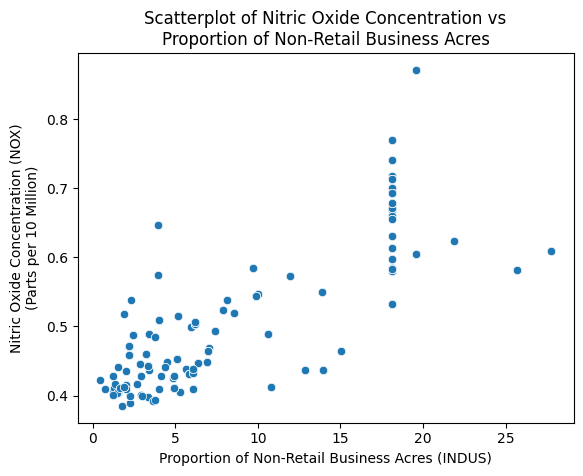

In [37]:
sns.scatterplot(x=boston_df["INDUS"], y=boston_df["NOX"])
pyplot.title("Scatterplot of Nitric Oxide Concentration vs\nProportion of Non-Retail Business Acres")
pyplot.ylabel("Nitric Oxide Concentration (NOX)\n(Parts per 10 Million)")
pyplot.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
#FINDINGS:
#generally, there appears to be a positive correlation whereby as INDUS increases, the NOX increases, so areas with lower
# proportions of non-retail businesses also tend to have lower NOX.
#However, whilst the relationship appears to positive, it is not perfectly linear.
#There is considerable spread, and a number of outliers which suggests areas with atypical and excessive NOX levels.

Text(0.5, 1.0, 'Histogram of Pupil-Teacher Ratio')

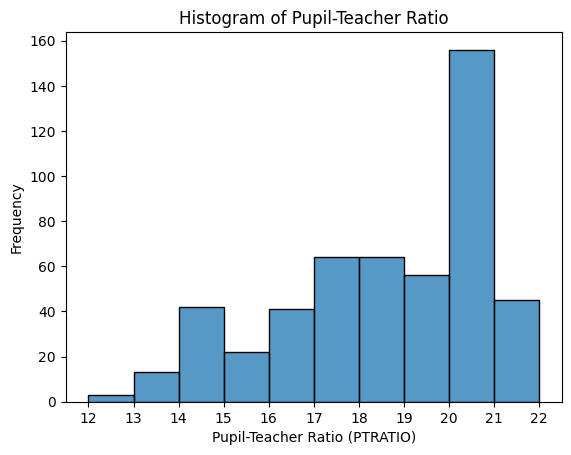

In [65]:
sns.histplot(boston_df["PTRATIO"], bins=range(12,23))
pyplot.xticks(range(12, 23))
pyplot.xlabel("Pupil-Teacher Ratio (PTRATIO)")
pyplot.ylabel("Frequency")
pyplot.title("Histogram of Pupil-Teacher Ratio")
#FINDINGS:
#in total, the PTRATIO ranges from 12 to 21 students for teacher
#the most common ratio is 20 students per teacher
#the least common ratio is 12 students per teacher

In [77]:
# QUESTION 1

# null hypothesis - there is no signifance difference in the median value of houses between those bounded by the Charles 
    # River and those not bounded by the Charles River.

# alternative hypothesis - there is a significant difference in the median value of houses based on whether they are
    # bounded by the Charles River or not.

# α = 0.05

MEDV_bound=boston_df[boston_df["CHAS"]==1]["MEDV"]
MEDV_unbound=boston_df[boston_df["CHAS"]==0]["MEDV"]
t_stat, p_value=scipy.stats.ttest_ind(MEDV_bound, MEDV_unbound, equal_var=False)
print("t_stat: {0}, p_value: {1}".format(t_stat,p_value))

t_stat: 3.113291312794837, p_value: 0.003567170098137517


In [ ]:
# CONCLUSION:
# p<0.05 therefore we reject the null hypothesis, and conclude that there is a statistically 
    # significant difference in the median value of houses between those bounded by the river and those not.

In [87]:
# QUESTION 2

# null hypothesis - there is no significant difference in median values of houses across different age groups.

# alternative hypothesis - there is a significant difference in the median value of houses across different age groups.

# α = 0.05

bins=[0, 35, 70, 100]
labels=["35 and Younger", "35-70", "70 and Older"]
boston_df["AGE_GROUP"]=pd.cut(boston_df["AGE"], bins=bins, labels=labels, right=True)

MEDV_35=boston_df[boston_df["AGE_GROUP"]=="35 and Younger"]["MEDV"]
MEDV_35_70=boston_df[boston_df["AGE_GROUP"]=="35-70"]["MEDV"]
MEDV_70=boston_df[boston_df["AGE_GROUP"]=="70 and Older"]["MEDV"]

f_stat, p_value=scipy.stats.f_oneway(MEDV_35, MEDV_35_70, MEDV_70)
print("f_stat: {0}, p_value: {1}".format(f_stat,p_value))

f_stat: 36.40764999196599, p_value: 1.7105011022702984e-15


In [ ]:
# CONCLUSION:
# p<0.05 therefore we reject the null hypothesis, and conclude that there is a statistically significant difference
    # in median home values across the different house age groups.

In [91]:
# QUESTION 3

# null hypothesis - there is no significant linear relationship between nitric oxide concentrations and proportion of
    # non-retail business acres per town

# alternative hypothesis - there is a significant linear relationship between nitric oxide concentrations and proportion
    # of non-retail business acres per town

# α = 0.05

corr_coeff, p_value=scipy.stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])
print("corr_coeff: {0}, p_value: {1}".format(corr_coeff,p_value))

corr_coeff: 0.7636514469209192, p_value: 7.913361061210442e-98


In [95]:
# CONCLUSION
# with an r=0.76, a very strong positive correlation is present, this suggests higher INDUS is strongly
    # correlated with higher NOX
# as p<0.05, we reject the null hypothesis, and conclude that there is a statistically significant linear relationship
    # between nitric oxide concentration and proportion of non-retail business acres per town.
# So, to answer the proposed question, no we cannot conclude that there is no relationship between the nitric oxide
    # concentration and proportion of non-retail business acres in town.

In [93]:
# QUESTION 4

# null hypothesis - weighted distance to the 5 Boston employment centres has no significant impact on the median
    # value of owner occupied homes.

# alternative hypothesis - weighted distance to the 5 Boston employment centres has a significant impact on the median
    # value of owner occupied homes.

# α = 0.05

x=boston_df["DIS"]
y=boston_df["MEDV"]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        16:26:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [94]:
# CONCLUSION
# as p<0.05, we reject the null analysis, and conclude that weighted distance to employment centres has a statistically
    # significant positive impact on median home values.
# as the coefficient constant is positive it suggests homes further away from the emplyment centres have higher median
    # values. Specifically for every unit of distance away from employment centres, the median home value increases by 
    # roughly $1,092.
# However, the low R-squared value of 0.062, and subsequent r value of 0.25, indicitive of a weak/moderate positive
    # correlation, suggests that distance from employment centres is not the only factor effecting the median value of
    # homes, and thus not a strong predictor of home value on its own.